<a href="https://colab.research.google.com/github/vieweghn/EENG-310-Signals-and-Systems/blob/main/EENG_310_HW09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
pi = np.pi

A. The fourier series of the periodic waveform (a) $f_1(t)$ below is given by:

$$ f_1(t) = 10 - \frac{20}{\pi} \sum_{n=1}^{\infty} \frac{1}{n} \sin\left(\frac{n\pi t}{2}\right). $$

Determine the Fourier series of the waveform (b) below.

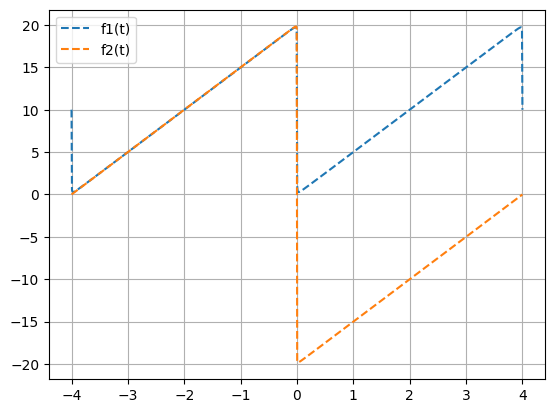

In [3]:
t = np.linspace(-4, 4, 1000)
f1 = lambda t: 10 - 20 / np.pi * sum(1 / n * np.sin(n * np.pi * t / 2) for n in range(1, 1000))
f2 = lambda t: -40 / np.pi * sum(1 / n * np.sin(n * np.pi * t / 4) for n in range(1, 10000))
plt.plot(t, f1(t), label='f1(t)', linestyle='--')
plt.plot(t, f2(t), label='f2(t)', linestyle='--')
plt.legend()
plt.grid()
plt.show()

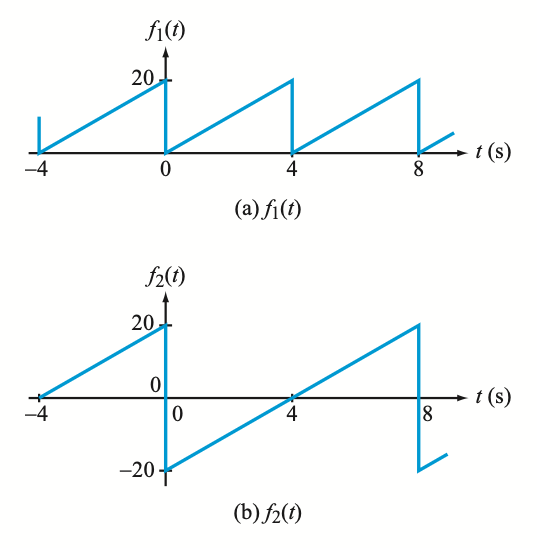

B. The current source $i_s(t)$ in the circuit below generates a sawtooth wave (see more below) with a peak amplitude of $20\mathrm{~mA}$ and a period of $T=\mathrm{~5ms}$.

1. Derive the Fourier series representation of $v_{\mathrm out}(t)$
2. Calculate the first five terms of $v_{\mathrm out}(t)$ using $R_1=500~\mathrm{\Omega}$, $R_2=2~\mathrm{k\Omega}$, and $C=0.33\mathrm{~\mu F}$.
3. Plot $v_\mathrm{out}(t)$, and $i_s(t)$ using $n_\mathrm{max}=100$.

1.) $i_{s}(t) = 10 - \frac{20}{\pi} \sum_{n=1}^{∞} \frac{1}{n}sin(\frac{n \pi t}{2})$

$v_{out}(t) = \frac{R_1}{\sqrt{(C \omega(R_2 + R_1))^2 + 1}}(10 - \frac{20}{\pi} \sum_{n=1}^{∞} \frac{1}{n}sin(\frac{n \pi t}{2} - e^{-j \tan^{-1}(C \omega (R_2 + R_1)}))$

In [35]:
t,R1,R2,C,T0, omega = sp.symbols("t,R1,R2,C,T0, omega", real=True, positive=True)
n = sp.symbols("n",integer=True)
s=sp.symbols("s")

subsVals = {T0:sp.Rational(5,1000), R1:500, R2:2000, C:sp.Rational(1,int(3e6))}

A = .02
Idc = A / 2
is_n = A / n / sp.pi

omega0 = 2*sp.pi/T0
H = R1 / (C*(R2 + R1)*s + 1)
H


R1/(C*s*(R1 + R2) + 1)

In [36]:
Fsum = Idc + sp.Sum(-is_n*sp.sin(omega0*n*t), (n, 1, 100))
Fsum.subs(subsVals)

Sum(-0.02*sin(400*pi*n*t)/(pi*n), (n, 1, 100)) + 0.01

In [37]:
i_s = .001 * (10 - (20 / sp.pi) * sp.Sum((1 / n) * sp.sin(n * omega0 * (t - 2*T0)), (n, 1, 1000)))
i_s

-0.02*Sum(sin(2*pi*n*(-2*T0 + t)/T0)/n, (n, 1, 1000))/pi + 0.01

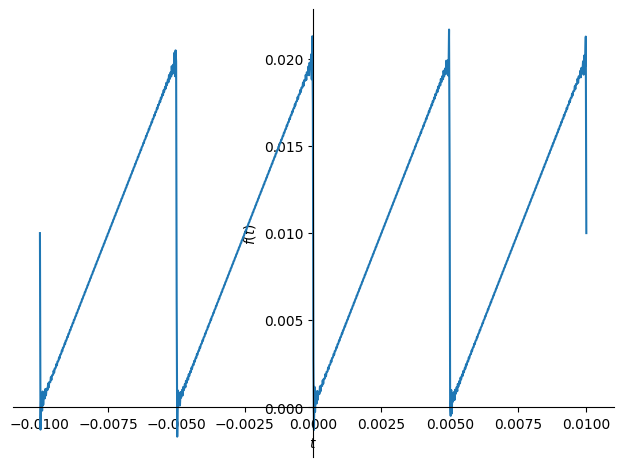

In [38]:
sp.plot(Fsum.subs(subsVals),(t,-.01,.01))

In [39]:
def Hmag(omega):
  return sp.Abs(H.subs({s:sp.I*omega}).subs(subsVals))

def Hphase(omega):
  return sp.arg(H.subs(s,sp.I*omega))

In [40]:
Fsum = Idc + sp.Sum(-is_n*sp.sin(omega0*n*t), (n, 1, 100))
Fsum.subs(subsVals)

Sum(-0.02*sin(400*pi*n*t)/(pi*n), (n, 1, 100)) + 0.01

In [41]:
Hmag(omega0*n)

1500/sqrt(pi**2*n**2 + 9)

In [45]:
NMAX = 5
for i in range(0, NMAX + 1):
  if i == 0:
    AMP = (Idc * R1).subs(subsVals)
    print(f'n_0: {AMP:.2f} V')
  else:
    AMP = (-(is_n).subs(n, i) * Hmag(i*omega0)).subs(subsVals).evalf()
    phase = Hphase(i*omega0).subs(subsVals)
    print(f'n_{i}: Vout = {AMP:.2e} sin({(omega0*i).subs(subsVals).evalf():.0f}t + {(180 / sp.pi) * phase.evalf():.2f})')

n_0: 5.00 V
n_1: Vout = -2.20e+0 sin(1257t + -46.32)
n_2: Vout = -6.86e-1 sin(2513t + -64.48)
n_3: Vout = -3.22e-1 sin(3770t + -72.34)
n_4: Vout = -1.85e-1 sin(5027t + -76.57)
n_5: Vout = -1.19e-1 sin(6283t + -79.19)


In [48]:
Vout = (Idc * R1) + sp.Sum(-is_n* Hmag(n*omega0) * sp.sin(omega0*n*t + Hphase(n*omega0)), (n, 1, 100))
Vout


0.01*R1 + Sum(-30.0*sin(arg(1/(2*I*pi*C*n*(R1 + R2)/T0 + 1)) + 2*pi*n*t/T0)/(pi*n*sqrt(pi**2*n**2 + 9)), (n, 1, 100))

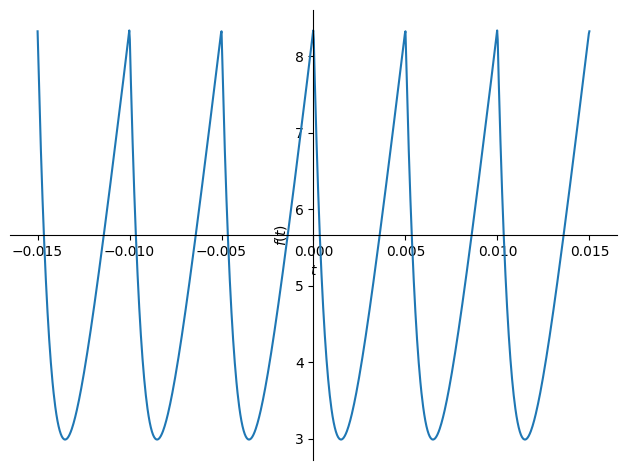

In [49]:
sp.plot(Vout.subs(subsVals),(t,-.015,.015))

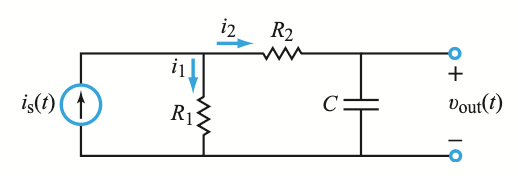

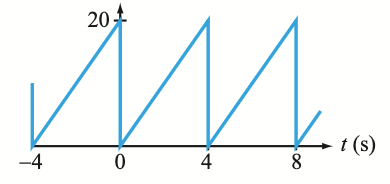

Here's what I got for the first 5 Fourier terms:

```
Term: n=0:   5.000 (DC)
Term: n=1:  -2.210 sin( 1260t + -46.0 deg)
Term: n=2:  -0.691 sin( 2510t + -64.3 deg)
Term: n=3:  -0.325 sin( 3770t + -72.2 deg)
Term: n=4:  -0.187 sin( 5030t + -76.4 deg)
```

The output should look like this when you're done.


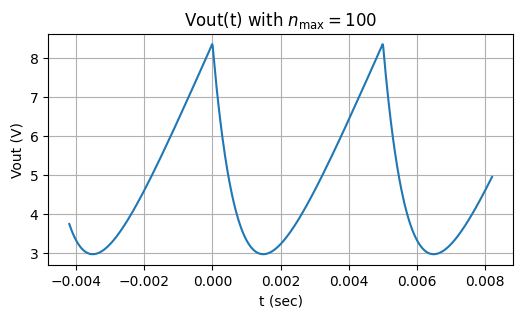

C. Voltage source $v_s(t)$ in the circuit below has the waveform displayed below.

1. Derive the Fourier series representation of $i(t)$.
2. Calculate the first five terms of $i(t)$ using:

$$ R_1 = R_2 = 10\mathrm{~\Omega} \text{ and } L_1=L_2=10\mathrm{~mH}$$
3. Plot $i(t)$ and $v_s(t)$ using $n_\mathrm{max}=100$.

In [57]:
t,R1,R2,L1, L2,T0, A = sp.symbols("t,R1,R2,L1,L2,T0, A", real=True, positive=True)
n = sp.symbols("n",integer=True)
s=sp.symbols("s")

subsVals = {T0:sp.Rational(1,1000), R1:10, R2:10, L1:sp.Rational(10,int(1e3)), L2:sp.Rational(10, int(1e3)), A:4}
Vs_n = A + 2 + (4 * A / n / sp.pi) * sp.sin(n * sp.pi / 2)

omega0 = 2*sp.pi/T0
NMAX = 5

In [58]:
Z1 = R2 + L2*s
Z2 = Z1 * (L1*s) / (Z1 + L1*s)
H = Z2 / (R1 + Z2) / Z1
H = sp.simplify(H)
H

L1*s/(L1*s*(L2*s + R2) + R1*(L1*s + L2*s + R2))

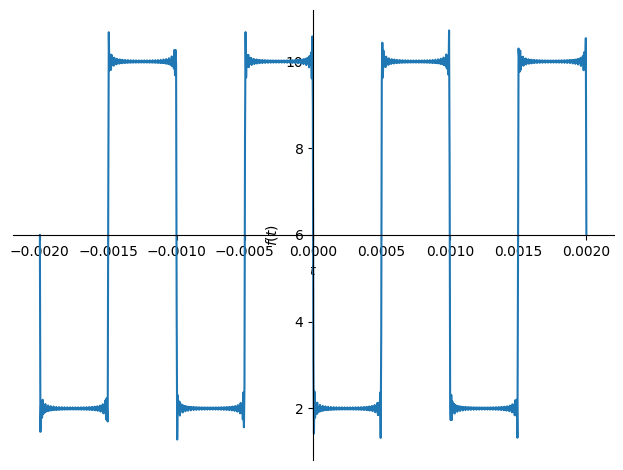

In [59]:
Vs = A + 2 + sp.Sum((4 * A / n / sp.pi) * sp.sin(n * sp.pi / 2) * sp.cos(n* omega0 * (t + T0/4) ), (n,1 ,100))
sp.plot(Vs.subs(subsVals), (t,-.002,.002))

In [60]:
def Hmag(omega):
  return sp.Abs(H.subs({s: sp.I * omega}))

def Hphase(omega):
  return sp.arg(H.subs({s: sp.I * omega}))

In [64]:
NMAX = 5
for i in range(1, NMAX + 1, 2):
    print(Hmag(omega0).subs(subsVals).evalf())
    print((Vs_n).subs(n, i).subs(subsVals).evalf())
    AMP = -((Vs_n).subs(n, i) * Hmag(i*omega0)).subs(subsVals).evalf()
    phase = (i * omega0 * T0/4 + Hphase(i*omega0)).subs(subsVals).evalf()
    #print(phase)
    print(f'n_{i}: Vout = {AMP:.3f} sin({(omega0/2*i).subs(subsVals).evalf():.0f}t + {((180 /  sp.pi * phase) - 90).evalf():.2f})')

0.0146641205499424
11.0929581789407
n_1: Vout = -0.163 sin(3142t + -63.90)
0.0146641205499424
4.30234727368645
n_3: Vout = -0.023 sin(9425t + 99.07)
0.0146641205499424
7.01859163578813
n_5: Vout = -0.022 sin(15708t + 275.46)


In [80]:
Iout = sp.Sum(Vs_n* Hmag(n*omega0) * sp.sin(omega0*n*t + Hphase(n*omega0)), (n, 1, 100))
Iout

Sum(2*pi*L1*(A + 4*A*sin(pi*n/2)/(pi*n) + 2)*sin(arg(I*n/(2*I*pi*L1*n*(2*I*pi*L2*n/T0 + R2)/T0 + R1*(2*I*pi*L1*n/T0 + 2*I*pi*L2*n/T0 + R2))) + 2*pi*n*t/T0)*Abs(n)/(T0*sqrt(16*pi**4*L1**2*L2**2*n**4/T0**4 + 4*pi**2*L1**2*R1**2*n**2/T0**2 + 8*pi**2*L1**2*R1*R2*n**2/T0**2 + 4*pi**2*L1**2*R2**2*n**2/T0**2 + 8*pi**2*L1*L2*R1**2*n**2/T0**2 + 4*pi**2*L2**2*R1**2*n**2/T0**2 + R1**2*R2**2)), (n, 1, 100))

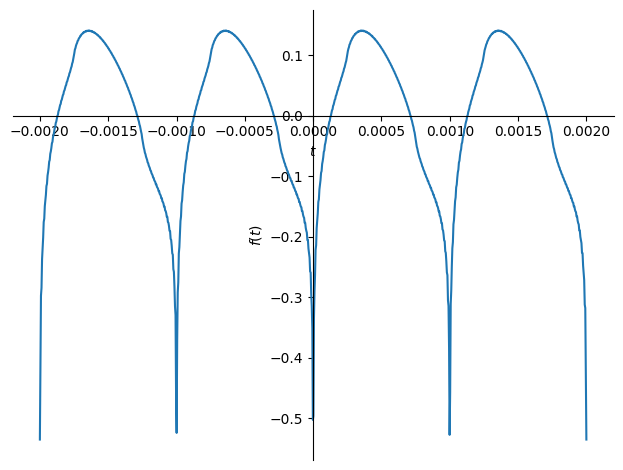

In [81]:
sp.plot(Iout.subs(subsVals), (t,-.002,.002))

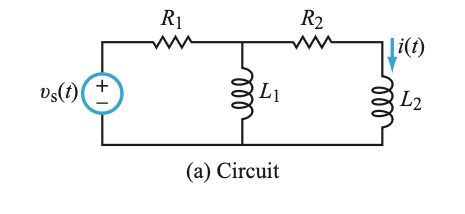

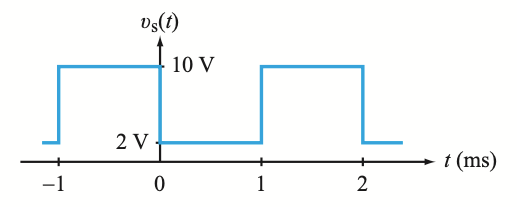

Here's what I got for the first five Fourier terms:

```
Term: n=1:  -0.124 sin( 3140t + -43.3 deg)
Term: n=3:  -0.017 sin( 9420t + -72.2 deg)
Term: n=5:  -0.006 sin(15700t + -79.1 deg)

n=0,2,4,6... are all zero

```

The correct output looks like this:

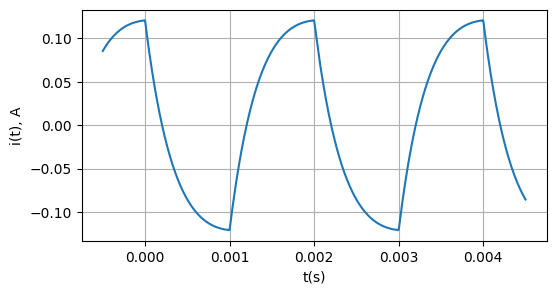